# Linear Regression

Importing data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* импорт необходимых библиотек для дальйнейшей работы

In [2]:
# Importing the dataset
df = pd.read_csv('invest_prep.csv', sep=';')
df.head(20)

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,num_times_borrowed_last_year,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,has_investment,num_financial_activities_last_year,literacy
0,0,False,57,True,True,1,True,0,True,False,1,False,False,False,True,True,2,False,0,True
1,1,False,40,False,True,2,False,0,False,False,1,False,False,False,False,False,2,False,0,True
2,2,False,35,True,True,0,False,1,False,False,1,False,True,False,True,False,2,False,2,False
3,2,True,19,True,False,0,False,0,False,False,0,False,False,False,True,False,1,False,0,True
4,3,False,61,True,True,0,False,1,False,False,1,False,False,False,False,False,1,False,0,False
5,3,True,16,True,False,0,False,1,True,False,1,False,False,False,True,True,1,False,0,True
6,0,False,40,False,True,0,False,2,False,False,0,False,True,False,False,False,0,True,0,False
7,1,False,27,True,True,2,False,1,False,False,0,False,False,False,False,False,0,False,1,False
8,3,True,35,False,True,0,True,0,False,False,0,True,True,False,True,True,2,True,2,True
9,4,False,72,True,False,1,False,2,False,False,2,False,False,False,False,False,2,False,4,False


* загрузка подготовленного раннее датасета.

In [3]:
df.shape

(8400, 20)

* датасет содержит 8400 наблюдений и 20 переменных (поскольку наиболее коррелируемые были удалены из модели)

# Correlations

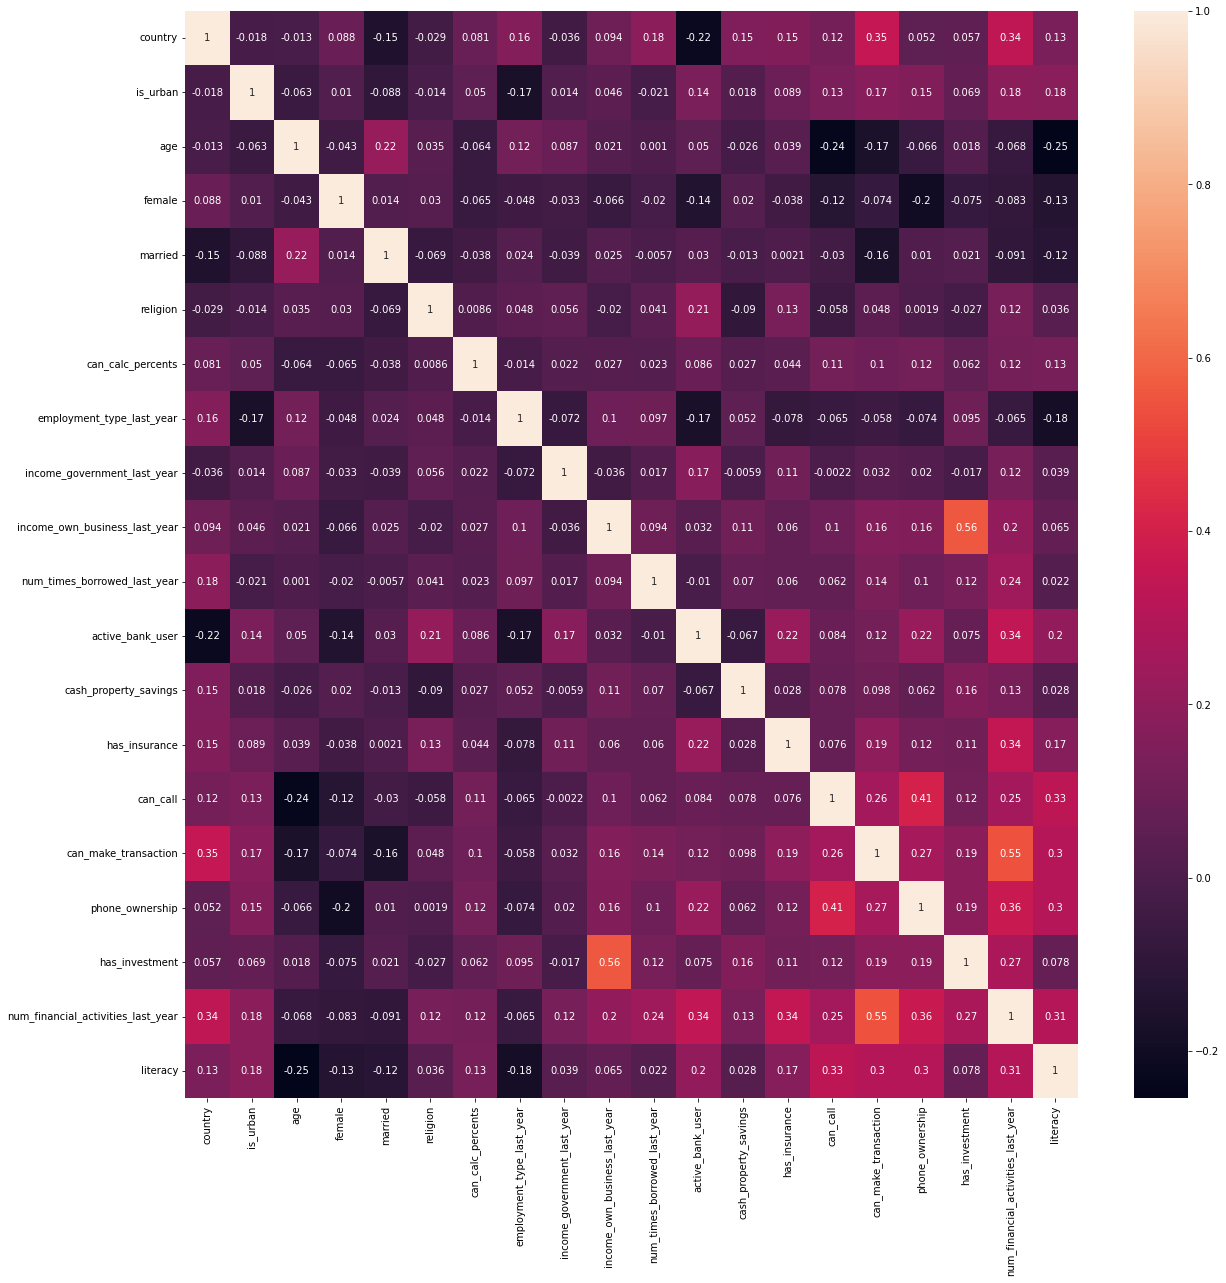

In [4]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

* наибольшее влияние на зависимую переменную (country) имеет переменная can_make_transaction и num_financial_activities_last_year. Для построения простой линейной регрессии выбираем первую из них. А так же делаем вывод, что у этих показателей прямая зависимость (в случае положительного ответа можно сделать предположение о экономическом состоянии страны).

# Splitting

In [5]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:]
y = df['country']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

* разделение датасета на обучающую и тестовую выборку (в процентом соотношении 80 на 20).

# Simple Linear Regression

In [6]:
# Fitting Simple Linear Regression to the Training set 
f1 = ['can_make_transaction']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([1.54041269]), 2.5256596717224116)

* как было сказано ранее - для просто линейной регрессии будет использоваться переменная can_make_transaction. Для модели соответственно получены значения коэффициента и свободного члена. 

In [7]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.12

* Получено значение R^2 = 0,12. Модель слабо описано, низкое качество. 

In [8]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse1

(1.88, 1.85)

Значение на обучающий выборке больше, что означает факт того, что модель не переобучена. Однако в целом качество такой модели на очень низком уровне.

# Multiple Linear Regression

In [9]:
#!pip install statsmodels

In [10]:
# Fitting Simple Linear Regression to the Training set 
f_all = ['is_urban','age', 'female', 'married', 'religion', 'can_calc_percents', 'employment_type_last_year', 'income_government_last_year', 'income_own_business_last_year', 'num_times_borrowed_last_year', 'active_bank_user', 'cash_property_savings', 'has_insurance', 'can_call', 'can_make_transaction', 'phone_ownership', 'has_investment', 'num_financial_activities_last_year','literacy']
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f_all], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([-0.27690231,  0.01269069,  0.41849439, -0.44967449, -0.11549442,
         0.23248598,  0.22270133, -0.31132759,  0.15814103,  0.15766678,
        -1.55265049,  0.23935553,  0.5616361 ,  0.23019463,  0.84856529,
        -0.12445584, -0.43805063,  0.31059405,  0.3191116 ]),
 1.5129272282057433)

In [11]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f_all])

# Coefficient of determination R^2
sr.score(X_train[f_all], y_train).round(3)

0.347

* Значение R^2 значительно увеличилось, однако все также остается на низком уровне. Модель слабо описана. Для дальнейшей работы целесообразно отобрать наиболее значимые переменные.

In [12]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse_all = mean_squared_error(y_train, sr.predict(X_train[f_all]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse_all

(1.62, 1.6)

# Checking p-values

In [13]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train.astype(float), X1.astype(float)).fit()
#mr1.pvalues
mr1.summary()

D:\Python_Anaconda\envs\LAB\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                country   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:07:55   Log-Likelihood:                -12774.
No. Observations:                6720   AIC:                         2.559e+04
Df Residuals:                    6700   BIC:                         2.572e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.5129      0.096     15.743      0.000       1.325       1.701
is_urban                              -0.2769      0.044     -6.284      0.000      -0.363      -0.191
age                                    0.0127      0.001      8.891      0.000       0.010       0.015
female                                 0.4185      0.041     10.087      0.000       0.337       0.500
married                               -0.4497      0.044    -10.332      0.000      -0.535      -0.364
religion                              -0.1155      0.028     -4.192      0.000      -0.170      -0.061
can_calc_percents                      0.2325      0.041      5.653      0.000       0.152       0.313
employment_type_last_year              0.2227      0.016     13.830      0.000       0.191       0.254
income_government_last_year           -0.3113      0.088     -3.540      0.000      -0.484      -0.139
income_own_business_last_year          0.1581      0.053      3.010      0.003       0.055       0.261
num_times_borrowed_last_year           0.1577      0.022      7.020      0.000       0.114       0.202
active_bank_user                      -1.5527      0.056    -27.645      0.000      -1.663      -1.443
cash_property_savings                  0.2394      0.042      5.716      0.000       0.157       0.321
has_insurance                          0.5616      0.064      8.719      0.000       0.435       0.688
can_call                               0.2302      0.054      4.272      0.000       0.125       0.336
can_make_transaction                   0.8486      0.054     15.604      0.000       0.742       0.955
phone_ownership                       -0.1245      0.030     -4.114      0.000      -0.184      -0.065
has_investment                        -0.4381      0.054     -8.170      0.000      -0.543      -0.333
num_financial_activities_last_year     0.3106      0.014     22.599      0.000       0.284       0.338
literacy                               0.3191      0.047      6.766      0.000       0.227       0.412
==============================================================================
Omnibus:                       19.311   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.706
Skew:                           0.036   Prob(JB):                     0.000388
Kurtosis:                       2.775   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Recursive feature elimination

In [14]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator,  n_features_to_select = 19)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

* По значимости P-value отобраны переменные для включения в модель (19) и продолжаем работу с множественной регрссиией на наиболее значимых переменных.

In [15]:
# Fitting Optimized Multiple Regression
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

# Getting parameters
mr_rfe.coef_, mr_rfe.intercept_

(array([-0.27690231,  0.01269069,  0.41849439, -0.44967449, -0.11549442,
         0.23248598,  0.22270133, -0.31132759,  0.15814103,  0.15766678,
        -1.55265049,  0.23935553,  0.5616361 ,  0.23019463,  0.84856529,
        -0.12445584, -0.43805063,  0.31059405,  0.3191116 ]),
 1.5129272282057433)

In [16]:

# Predicting the Test set results
y_pred = mr_rfe.predict(X_test[f_lm])

# Coefficient of determination R^2
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.347

In [17]:
# Mean squared error
mse2 = mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse2

(1.62, 1.6)

In [18]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 18)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm1 = []
for column in selected_columns:
    f_lm1.append(X.columns[column])

In [19]:
# Fitting Optimized Multiple Regression
mr_rfe1 = LinearRegression().fit(X_train[f_lm1], y_train)

# Getting parameters
mr_rfe1.coef_, mr_rfe1.intercept_

(array([-0.26720043,  0.38895425, -0.37445346, -0.11084521,  0.22312761,
         0.23365159, -0.2351416 ,  0.1710363 ,  0.15745681, -1.5223281 ,
         0.23921686,  0.60261968,  0.14574321,  0.81317806, -0.11575941,
        -0.43071084,  0.31172136,  0.24549542]),
 2.003442983034947)

In [20]:

# Predicting the Test set results
y_pred = mr_rfe1.predict(X_test[f_lm1])

# Coefficient of determination R^2
mr_rfe1.score(X_train[f_lm1], y_train).round(3)

0.339

In [21]:
# Mean squared error
mse3 = mean_squared_error(y_train, mr_rfe1.predict(X_train[f_lm1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse3

(1.63, 1.62)

* По сравнению с простой линейной регрессией - данная модель имеет лучшие показатели. Значение R^2 на всех переменных и на наиболее значимых практически не отличается, а значение MSE уменьшилось и переобучения модели не произошло.

In [22]:

# Backward Elimination with p-values
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y.astype(float), x.astype(float)).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.01
X_Modeled = backwardElimination(X_train, y_train, SL)

D:\Python_Anaconda\envs\LAB\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* Отбор соответсвующих значимых переменных по критерию порогового значения (SL). Данный метод удобен для большого числа переменных, когда сложно посчитать сколько именно по критерию p-value значимых предикторов. Таким образом подобрано наиболее оптимальное пороговое значение (0.01).

In [23]:
# Fitting Optimized Multiple Regression
mr_be = LinearRegression().fit(X_Modeled, y_train)

# Coefficient of determination R^2
mr_be.score(X_Modeled, y_train).round(3)

0.347

* Значение R^2 не изменилось по сравнению с моделью множественной регрессии (построенной на всех переменных).

# Polynomial Regression

In [24]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p[:,1:], y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 6.33842353e+03,  3.88991453e-02, -5.83153388e+08,  3.45949756e+08,
         9.98318801e-01,  3.29271065e+08, -1.14203687e-02,  2.38565426e+08,
        -3.26902220e+08,  6.36140289e-02,  1.70656335e+07,  1.36819979e+06,
        -4.54992546e+07,  2.42276281e+07, -1.61384248e+08,  3.80849657e-01,
         6.71798412e+08,  4.60123259e-01,  2.27273298e+08, -6.33840946e+03,
        -1.41961108e-03, -1.56210676e-01,  1.63598414e-01, -2.30504163e-02,
         5.07282262e-02,  4.64350468e-03, -1.33511247e-01, -2.32843841e-01,
         9.12280067e-02, -2.48982314e-01, -6.21360190e-02, -1.39120366e-01,
        -1.24223103e-01,  1.59610800e-01, -4.10923064e-02,  9.77509478e-02,
         2.90461592e-02, -1.04255423e-01, -8.46385956e-05, -6.12810254e-03,
        -1.34897977e-02, -1.74693167e-02, -2.20298767e-03,  1.40985847e-03,
         1.03342533e-03,  4.11975384e-03,  5.43683767e-04,  2.63541937e-03,
        -4.69029695e-03,  7.01060891e-03, -7.17365742e-03, -2.26536393e-03,
         4.2

*Построена модель полиномиальной регрессии. Следует отметить, что в нулевую степень переменные не были возведены (столбец единиц был исключен для большего качества).

In [25]:

# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train).round(3)

0.429

In [26]:
# Mean squared error
mse4 = mean_squared_error(y_train, pr.predict(X_train_p[:,1:]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)
mse4

(1.51, 1.55)

Значение R^2 вышло на максимальный уровень, что указывает на улучшение качества модели. Значение MSE на тестовой выборке несколько больше, чем на обучающей, однако в целом они сопастовимы. Таким образом, данная процедура дает нам наилучшую модель из полученных нами.

# RESULTS

# ! ЛИНЕЙНАЯ РЕГРЕССИЯ !

In [28]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.12

In [29]:
mse1

(1.88, 1.85)

# ! МНОЖЕСТВЕННАЯ РЕГРЕССИЯ !

In [31]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f_all])

# Coefficient of determination R^2
sr.score(X_train[f_all], y_train).round(3)

0.347

In [32]:
mse_all

(1.62, 1.6)

# ! 19 переменных !

In [33]:
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.347

In [34]:
mse2

(1.62, 1.6)

# ! 18 переменных !

In [35]:
mr_rfe1.score(X_train[f_lm1], y_train).round(3)
#20 переменных - множественная регрессия

0.339

In [36]:
mse3

(1.63, 1.62)

# ОТБОР P-VALUES

In [37]:
mr_be.score(X_Modeled, y_train).round(3)
#на основе отбора p-values

0.347

# ПОЛИНОМИАЛЬНАЯ РЕГРЕССИЯ

In [38]:
pr.score(X_train_p[:,1:], y_train).round(3)
#Полиномиальная регрессия

0.429

In [39]:
mse4

(1.51, 1.55)

 ВЫВОД: несмотря, на добавленные в модель переменные - значительного улучшения по качеству не наблюдалось. Модель была построена, как на всех переменных, так и на исключенных по корреляционной таблице. Значение R^2 при этом на том же уровне, поэтому нет смысла оставлять коррелирующие переменные. Исходя из всех методов- полиномиальная регрессия справилась наилучшим образом. Однако модель описана не на высоком уровне и качество желает оставлять лучшего. Поэтому делаем вывод, что тех исходных данных, которые были выбраны для модели с возможностью дальнейшей интерпретации и возможного корректного описаниян - их недостаточно. Далее следует попробовать методы нелинейной регресси и сделать окончательный вывод. 
Так же следует заметить, что отталкиваясь от значения p-value - можно сказать, что все переменные значимы. Значит делаем вывод, что для работы были корректно отобраны предикторы, которые наилучшим образом влияют на модель. Однако чтобы добиться максимального результата в дальнейшей работе исключим income_own_business_last_year, поскольку значимость несколько хуже, среди остальных переменных.

# Pickle

In [40]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

"консервация" полученных данных для дальнейшего их использования